# Load Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

## Data Overview
- **Numerical**
    - LIMIT_BAL: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit
    - AGE: Age (year)
    - BILL_AMT: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005
    - PAY_AMT: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005
- **Categorical**
    - **default.payment.next.month: default payment (Yes = 1, No = 0) - TARGET VARIABLE**
    - SEX: Gender (1 = male; 2 = female)
    - EDUCATION: Education (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
    - MARRIAGE: Marital status (1 = married; 2 = single; 3 = others)
    - PAY: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: **-1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above**

In [6]:
raw_data = pd.read_csv('C:\\Users\\Inno Mvula\\Desktop\\data analysis projects\\predictive_modeling_projects\\credit_risk_modeling\\credit_default_analysis\\default-of-credit-card-clients.csv')
raw_df = raw_data.copy()

# Data Cleaning

In [8]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [9]:
# check for missing values
raw_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [10]:
raw_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


**Comments**
- there appear to be no missing values
- id has no relevance so will be dropped

In [12]:
raw_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [13]:
# rename columns
raw_df.columns = ['id', 'limit_bal', 'sex', 'education', 'marriage', 'age', 'repay_status_sep',
       'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may', 'repay_status_apr', 'bill_amt_sep', 'bill_amt_aug',
       'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 'pay_amt_aug',
       'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'pay_amt_mar',
       'default_payment']

In [14]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                30000 non-null  int64  
 1   limit_bal         30000 non-null  float64
 2   sex               30000 non-null  int64  
 3   education         30000 non-null  int64  
 4   marriage          30000 non-null  int64  
 5   age               30000 non-null  int64  
 6   repay_status_sep  30000 non-null  int64  
 7   repay_status_aug  30000 non-null  int64  
 8   repay_status_jul  30000 non-null  int64  
 9   repay_status_jun  30000 non-null  int64  
 10  repay_status_may  30000 non-null  int64  
 11  repay_status_apr  30000 non-null  int64  
 12  bill_amt_sep      30000 non-null  float64
 13  bill_amt_aug      30000 non-null  float64
 14  bill_amt_jul      30000 non-null  float64
 15  bill_amt_jun      30000 non-null  float64
 16  bill_amt_may      30000 non-null  float6

In [15]:
# group variables
feat = ['limit_bal', 'sex', 'education', 'marriage', 'age', 'repay_status_sep',
        'repay_status_aug', 'repay_status_jul', 'repay_status_jun', 'repay_status_may',
        'repay_status_apr', 'bill_amt_sep', 'bill_amt_aug', 'bill_amt_jul', 'bill_amt_jun', 
        'bill_amt_may', 'bill_amt_apr', 'pay_amt_aug', 'pay_amt_jul', 
        'pay_amt_jun', 'pay_amt_may', 'pay_amt_apr', 'pay_amt_mar', 'default_payment']

num_data = ['limit_bal', 'age',  'bill_amt_sep', 'bill_amt_aug',
            'bill_amt_jul', 'bill_amt_jun', 'bill_amt_may', 'bill_amt_apr', 
            'pay_amt_aug', 'pay_amt_jul', 'pay_amt_jun', 'pay_amt_may', 
            'pay_amt_apr', 'pay_amt_mar']

cat_data = ['sex', 'education', 'marriage', 'repay_status_sep', 'repay_status_aug', 
            'repay_status_jul', 'repay_status_jun', 'repay_status_may', 
            'repay_status_apr']

target = 'default_payment'

In [16]:
# check unique values of categorical variables
for i in cat_data:
    print(f"{i}:\n", raw_df[i].unique())

sex:
 [2 1]
education:
 [2 1 3 5 4 6 0]
marriage:
 [1 2 3 0]
repay_status_sep:
 [ 2 -1  0 -2  1  3  4  8  7  5  6]
repay_status_aug:
 [ 2  0 -1 -2  3  5  7  4  1  6  8]
repay_status_jul:
 [-1  0  2 -2  3  4  6  7  1  5  8]
repay_status_jun:
 [-1  0 -2  2  3  4  5  7  6  1  8]
repay_status_may:
 [-2  0 -1  2  3  5  4  7  8  6]
repay_status_apr:
 [-2  2  0 -1  3  6  4  7  8  5]


In [17]:
# check distribution of education column
raw_df.groupby('education')['id'].size()

education
0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: id, dtype: int64

In [18]:
# check distribution of marriage column
raw_df.groupby('marriage')['id'].size()

marriage
0       54
1    13659
2    15964
3      323
Name: id, dtype: int64

In [19]:
raw_df.groupby('repay_status_jun')['id'].size()

repay_status_jun
-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: id, dtype: int64

In [20]:
raw_df[raw_df['repay_status_aug'] == 0][['bill_amt_aug', 'pay_amt_aug']]

,bill_amt_aug,pay_amt_aug
2,14027.0,1518.0
3,48233.0,2000.0
4,5670.0,2000.0
5,57069.0,2500.0
6,412023.0,55000.0
...,...,...
29988,252913.0,65000.0
29990,137142.0,6000.0
29992,10400.0,2000.0
29995,192815.0,8500.0


**comments**
- There are categories within the education (0), marriage (0) and repay_status (-2 and 0) columns that do not appear in the data description.
    - education: we will merge category 0 and 6 into category 5.
    - marriage: we will merge category 0 into 3.
    - repay_status: after careful analysis of the data it appears that
      - -2 : no payment due to no outstanding balance
      - 0: minimum payment

In [22]:
# modify education  and marriage column
raw_df['education'] = raw_df['education'].replace({0:5,1:1,2:2,3:3,4:4,5:5,6:5})
raw_df['marriage'] = raw_df['marriage'].replace({0:3,1:1,2:2,3:3})

In [23]:
# check unique values of categorical variables
for i in cat_data:
    print(f"{i}:\n", raw_df[i].unique())

sex:
 [2 1]
education:
 [2 1 3 5 4]
marriage:
 [1 2 3]
repay_status_sep:
 [ 2 -1  0 -2  1  3  4  8  7  5  6]
repay_status_aug:
 [ 2  0 -1 -2  3  5  7  4  1  6  8]
repay_status_jul:
 [-1  0  2 -2  3  4  6  7  1  5  8]
repay_status_jun:
 [-1  0 -2  2  3  4  5  7  6  1  8]
repay_status_may:
 [-2  0 -1  2  3  5  4  7  8  6]
repay_status_apr:
 [-2  2  0 -1  3  6  4  7  8  5]


In [24]:
# check distribution of education column
raw_df.groupby('education')['limit_bal'].size()

education
1    10585
2    14030
3     4917
4      123
5      345
Name: limit_bal, dtype: int64

In [25]:
# drop id column
raw_df.drop('id', axis = 1, inplace = True)

In [26]:
clean_df = raw_df.copy()

# EDA

In [28]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   limit_bal         30000 non-null  float64
 1   sex               30000 non-null  int64  
 2   education         30000 non-null  int64  
 3   marriage          30000 non-null  int64  
 4   age               30000 non-null  int64  
 5   repay_status_sep  30000 non-null  int64  
 6   repay_status_aug  30000 non-null  int64  
 7   repay_status_jul  30000 non-null  int64  
 8   repay_status_jun  30000 non-null  int64  
 9   repay_status_may  30000 non-null  int64  
 10  repay_status_apr  30000 non-null  int64  
 11  bill_amt_sep      30000 non-null  float64
 12  bill_amt_aug      30000 non-null  float64
 13  bill_amt_jul      30000 non-null  float64
 14  bill_amt_jun      30000 non-null  float64
 15  bill_amt_may      30000 non-null  float64
 16  bill_amt_apr      30000 non-null  float6

## Univariate Analysis

In [30]:
# summary statistics
clean_df[num_data].describe()

,limit_bal,age,bill_amt_sep,bill_amt_aug,bill_amt_jul,bill_amt_jun,bill_amt_may,bill_amt_apr,pay_amt_aug,pay_amt_jul,pay_amt_jun,pay_amt_may,pay_amt_apr,pay_amt_mar
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


**comments**
- All of the numerical variables are right-skewed. Age is also right-skewed but closer to a normal distribution than the other variables.
- there could be outliers present in the dataset which we will handle late on

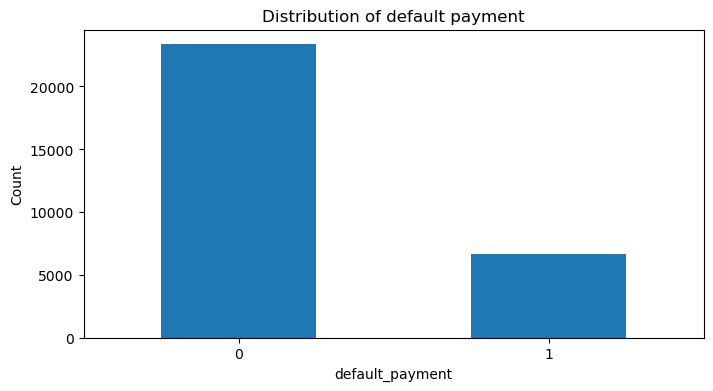

In [32]:
plt.figure(figsize=(8, 4))
clean_df['default_payment'].value_counts().sort_index().plot(kind='bar', rot=0)
plt.ylabel("Count")
plt.title(f"Distribution of default payment")
plt.show()


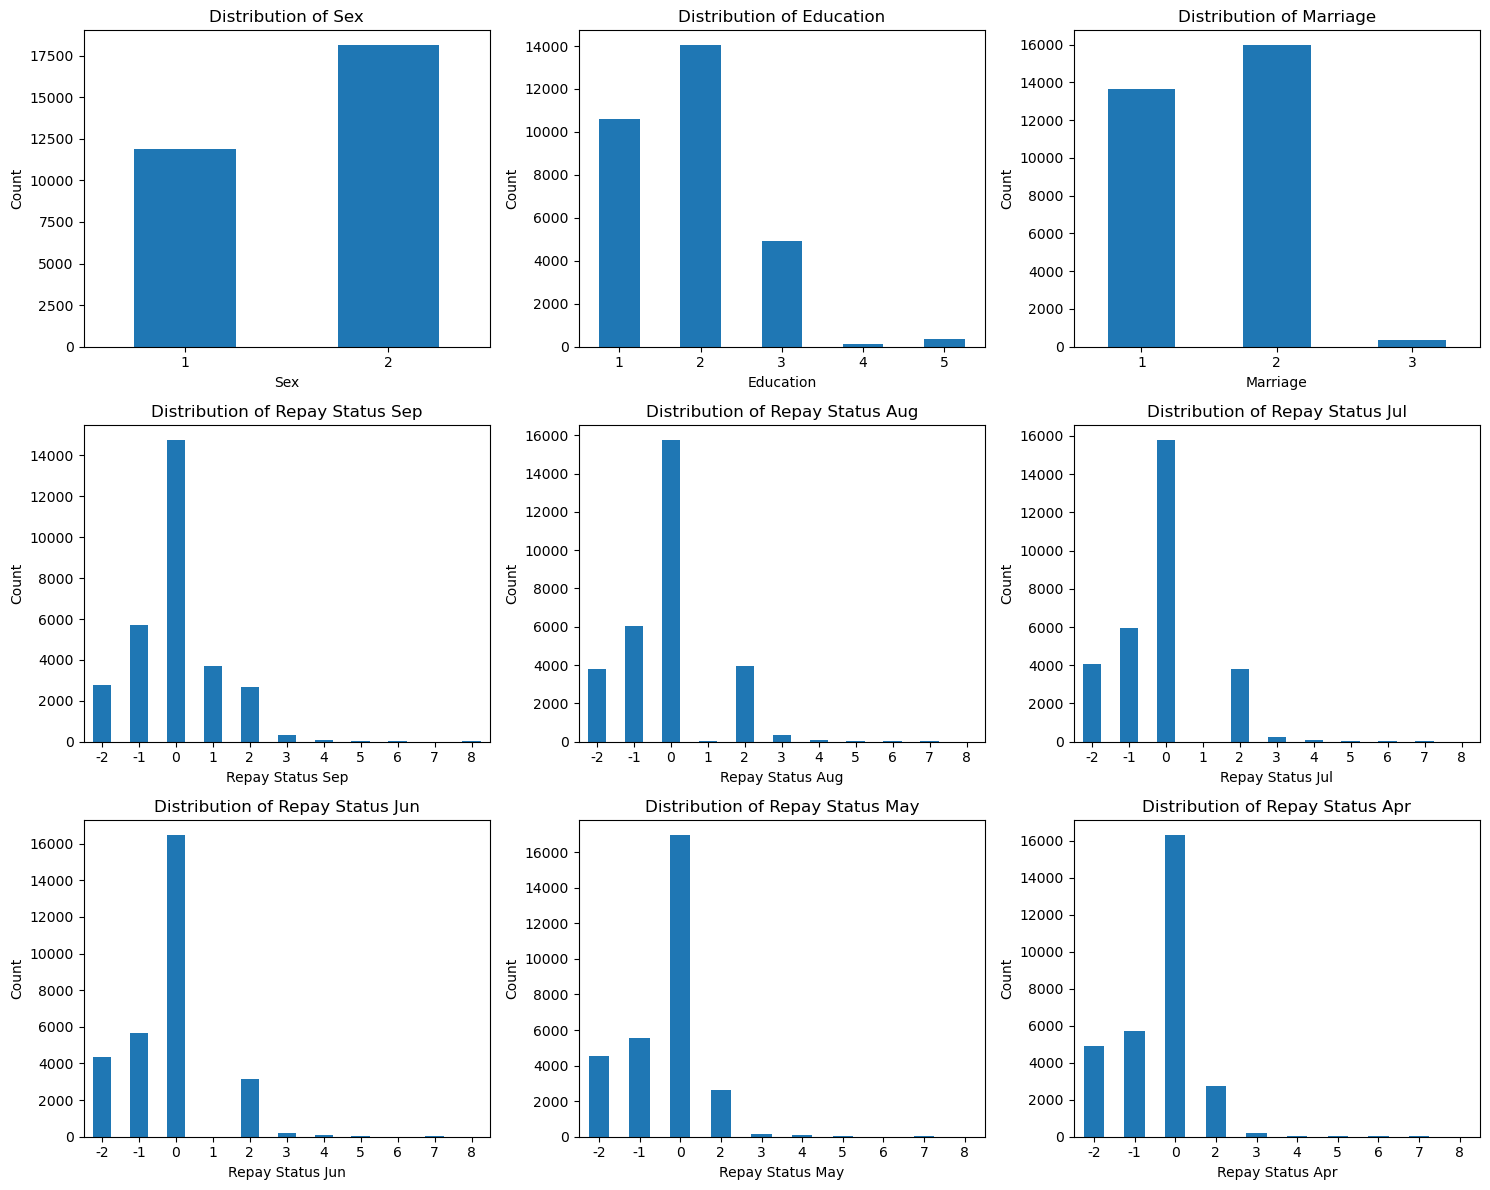

In [33]:
# categorical variables distribution


# Define number of rows and columns for subplots
num_vars = len(cat_data)
cols = 3  # Number of columns
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate bar plots for each categorical variable
for i, col in enumerate(cat_data):
    clean_df[col].value_counts().sort_index().plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f"Distribution of {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel("Count")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**comments**
- Default Payment
  - The majority of customers are unlikely to default next month by a significant margin.
- Sex
  - There are more women than men represented in this data set
- Education
  - Most people have either a graduate or university-level education.
- Marital Status
  - Most people are either single or married, with single being the most represented.
- Repayment status
  - 0 is the most common repayment status each month, indicating that most people make only the minimum payment toward their bills. This is followed by those who either pay in full or do not pay at all due to having no balance. Few customers delay payments for more than two months.

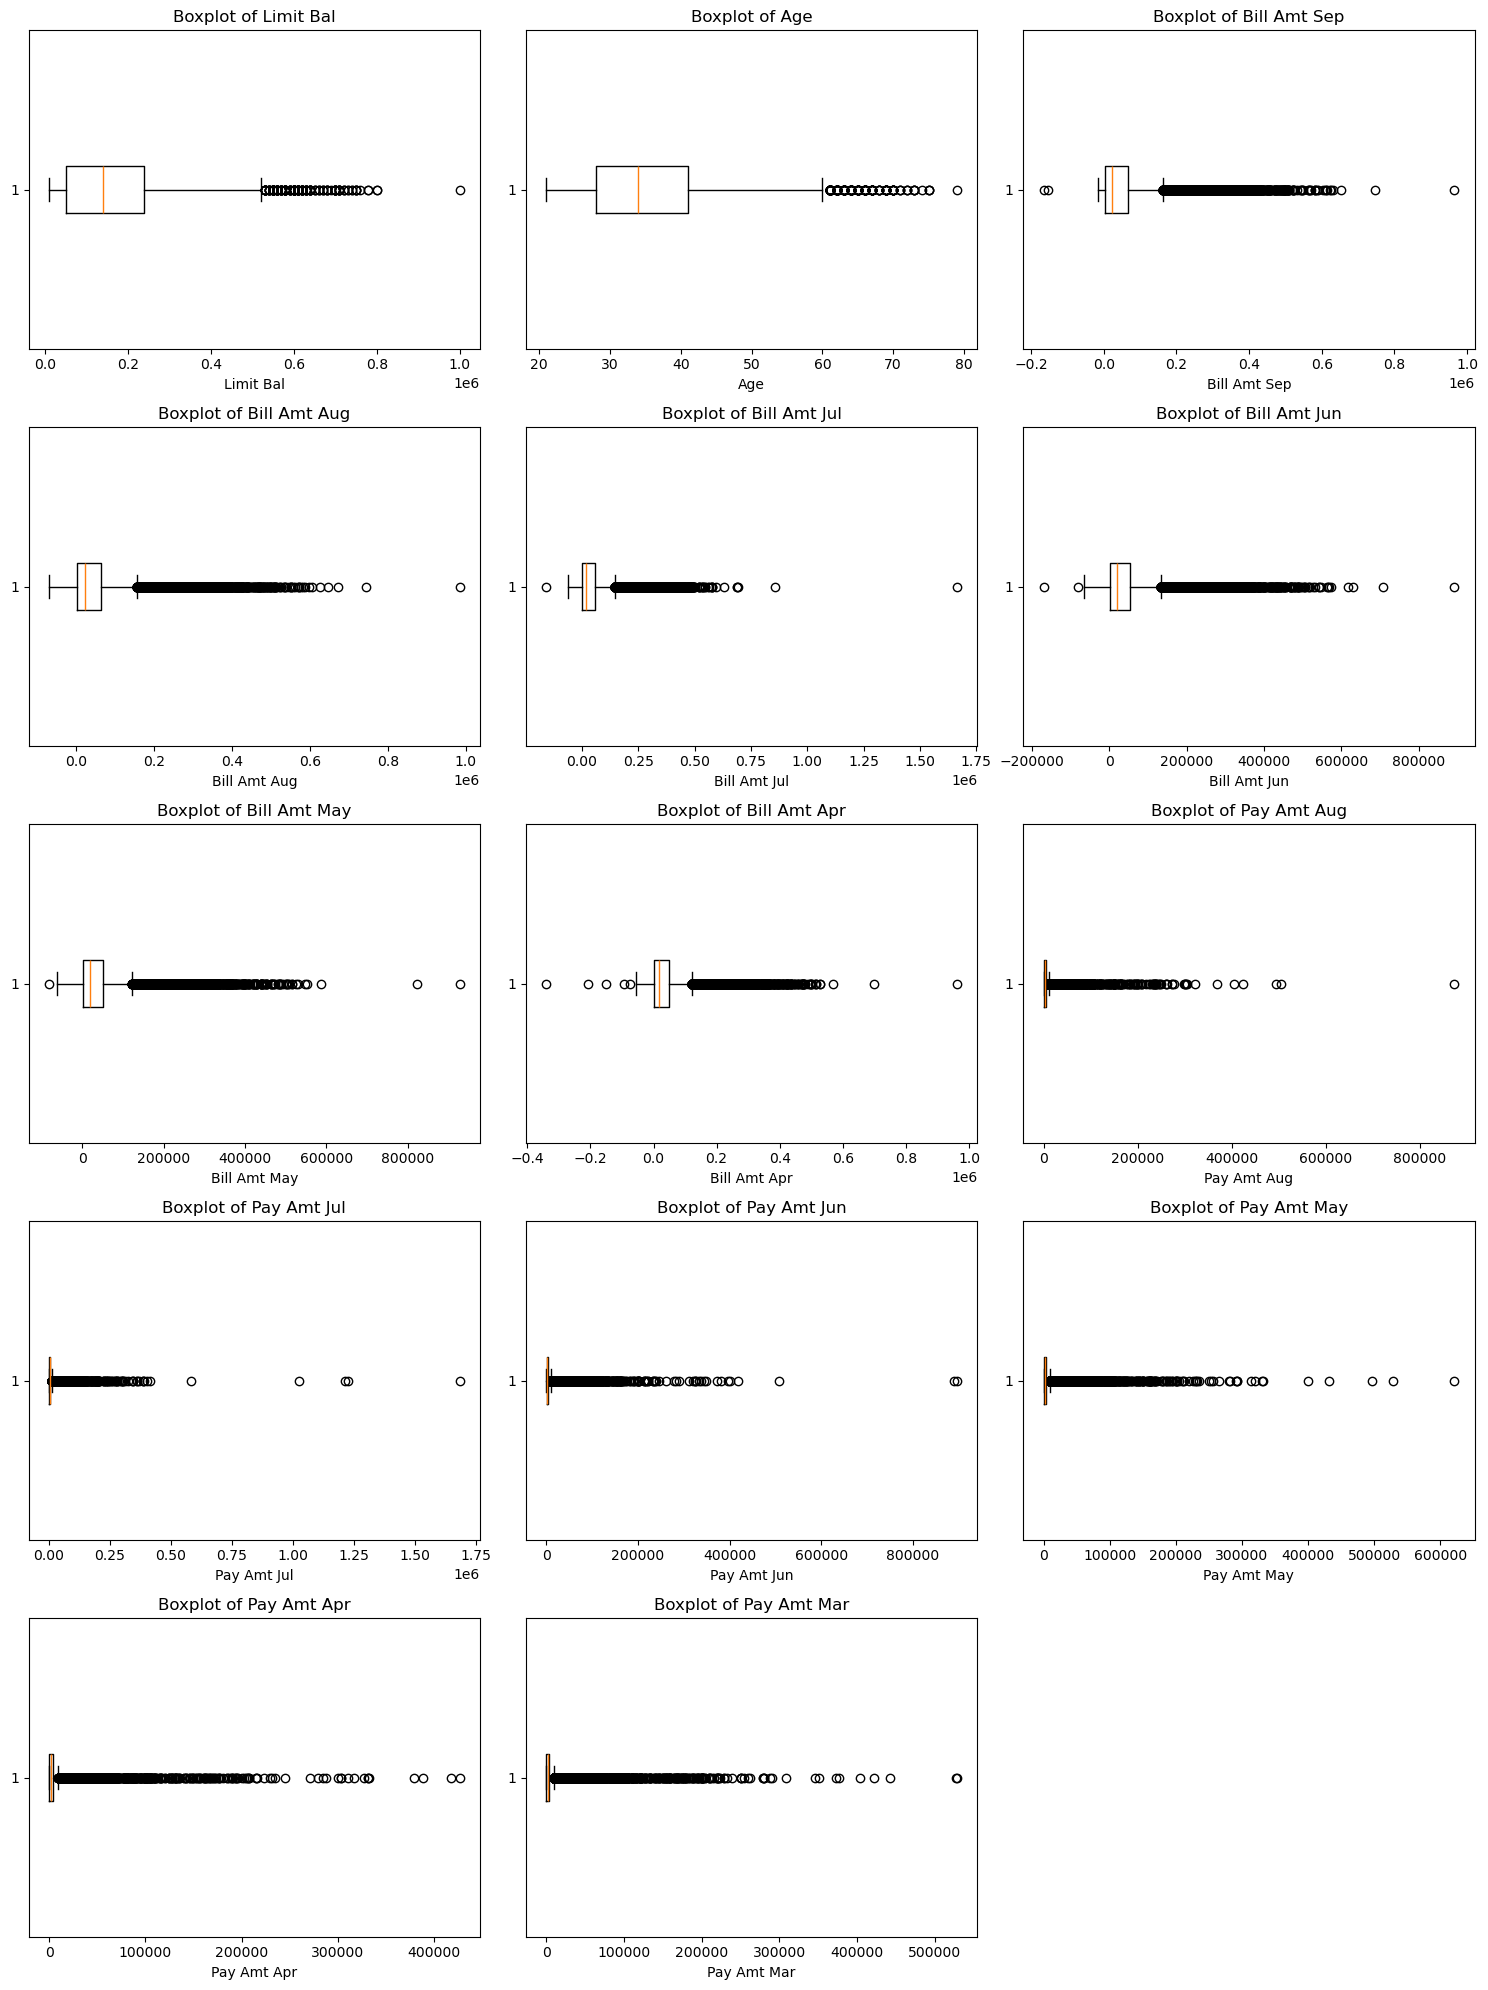

In [35]:
# Define number of rows and columns for subplots
num_vars = len(num_data)
cols = 3  # Number of columns
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 4))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate boxplots for each numerical variable
for i, col in enumerate(num_data):
    axes[i].boxplot(clean_df[col].dropna(), vert=False)  # Horizontal boxplot for readability
    axes[i].set_title(f"Boxplot of {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace("_", " ").title())

# Remove any empty subplots (in case rows * cols is larger than needed)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Comments**

- Bill Amounts (bill_amt_*)
  - Significant outliers in both positive and negative values. Negative values might indicate refunds, adjustments, or errors.
  - A few customers have exceptionally high balances, which could impact modeling.
- Payment Amounts (pay_amt_*)
  - Many payments are clustered near zero, suggesting a large number of low or missed payments.
  - Some payments are very large outliers, meaning a few customers pay significantly more than the average.
- Credit Limit (limit_bal)
  - Wide range, from 10,000 to 1,000,000.
  - Most customers have relatively low credit limits, but some high-end users skew the distribution.
- Age (age)
  - No extreme outliers, with most customers between 20 and 60 years old.

## Multivariate analysis

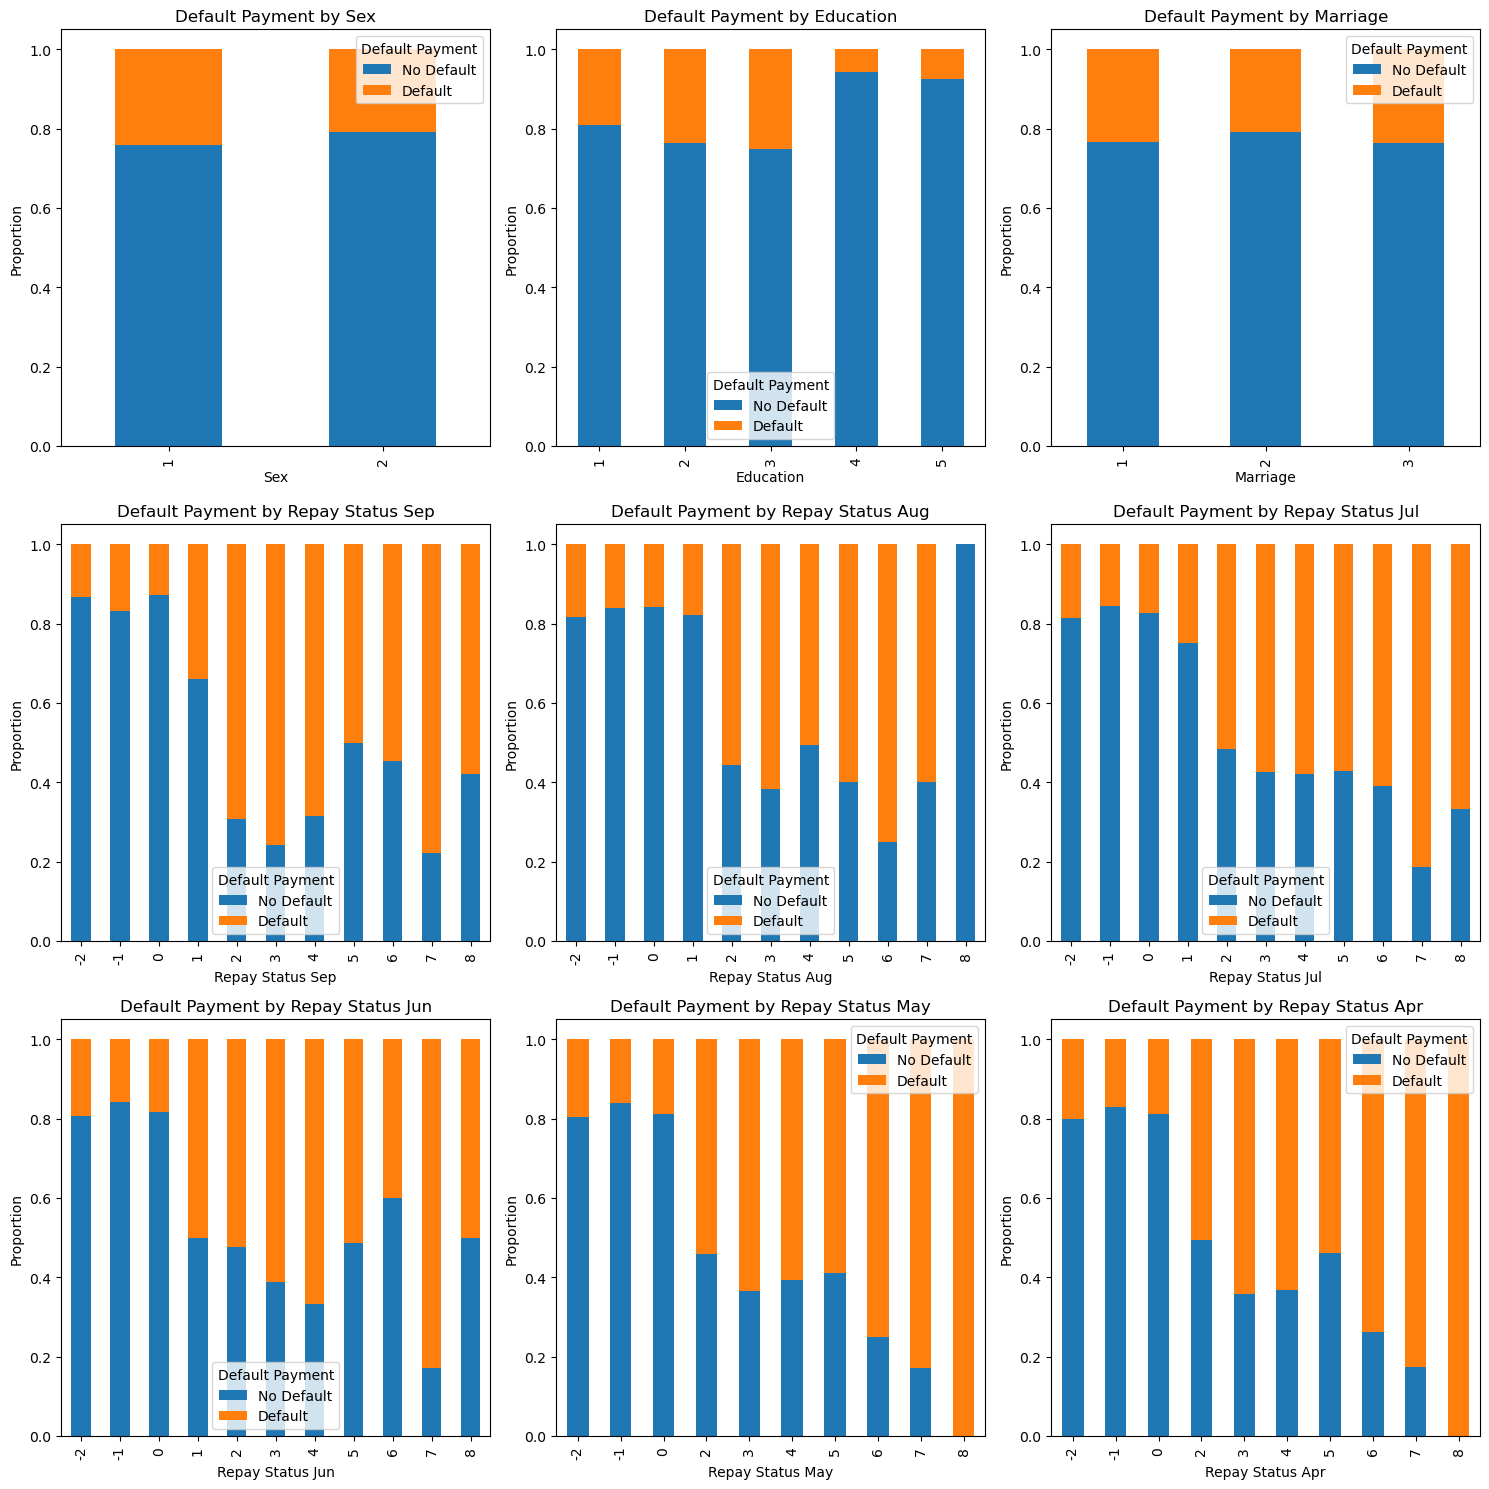

In [38]:
# Define number of rows and columns for subplots
num_vars = len(cat_data)
cols = 3  # Number of columns
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate stacked bar charts for each categorical variable with default payments factored in
for i, col in enumerate(cat_data):
    # Get value counts for default=0 and default=1 grouped by the categorical variable
    default_counts = clean_df.groupby(col)["default_payment"].value_counts(normalize=True).unstack()
    
    # Plot stacked bar chart with percentages
    default_counts.plot(kind="bar", stacked=True, ax=axes[i], color=["#1f77b4", "#ff7f0e"])
    axes[i].set_title(f"Default Payment by {col.replace('_', ' ').title()}")
    axes[i].set_xlabel(col.replace("_", " ").title())
    axes[i].set_ylabel("Proportion")
    axes[i].legend(["No Default", "Default"], title="Default Payment")
    
# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Comments**
- Sex
  - Default rates are relatively similar across the sexes. Might not be a strong predictor
  - Men have slightly higher default rates
- Education
  - Default rates decline with higher education. Potential to be a good predictor
- Marital Status
  - Default rates are relatively similar across marital statuses.
  - Single customers have slightly higher default rates.
- Repayment status
  - Customers who had longer delays (1+ months) in previous payments show a higher likelihood of default.
  - Those who paid duly (-1) or had no balance (-2) rarely default.

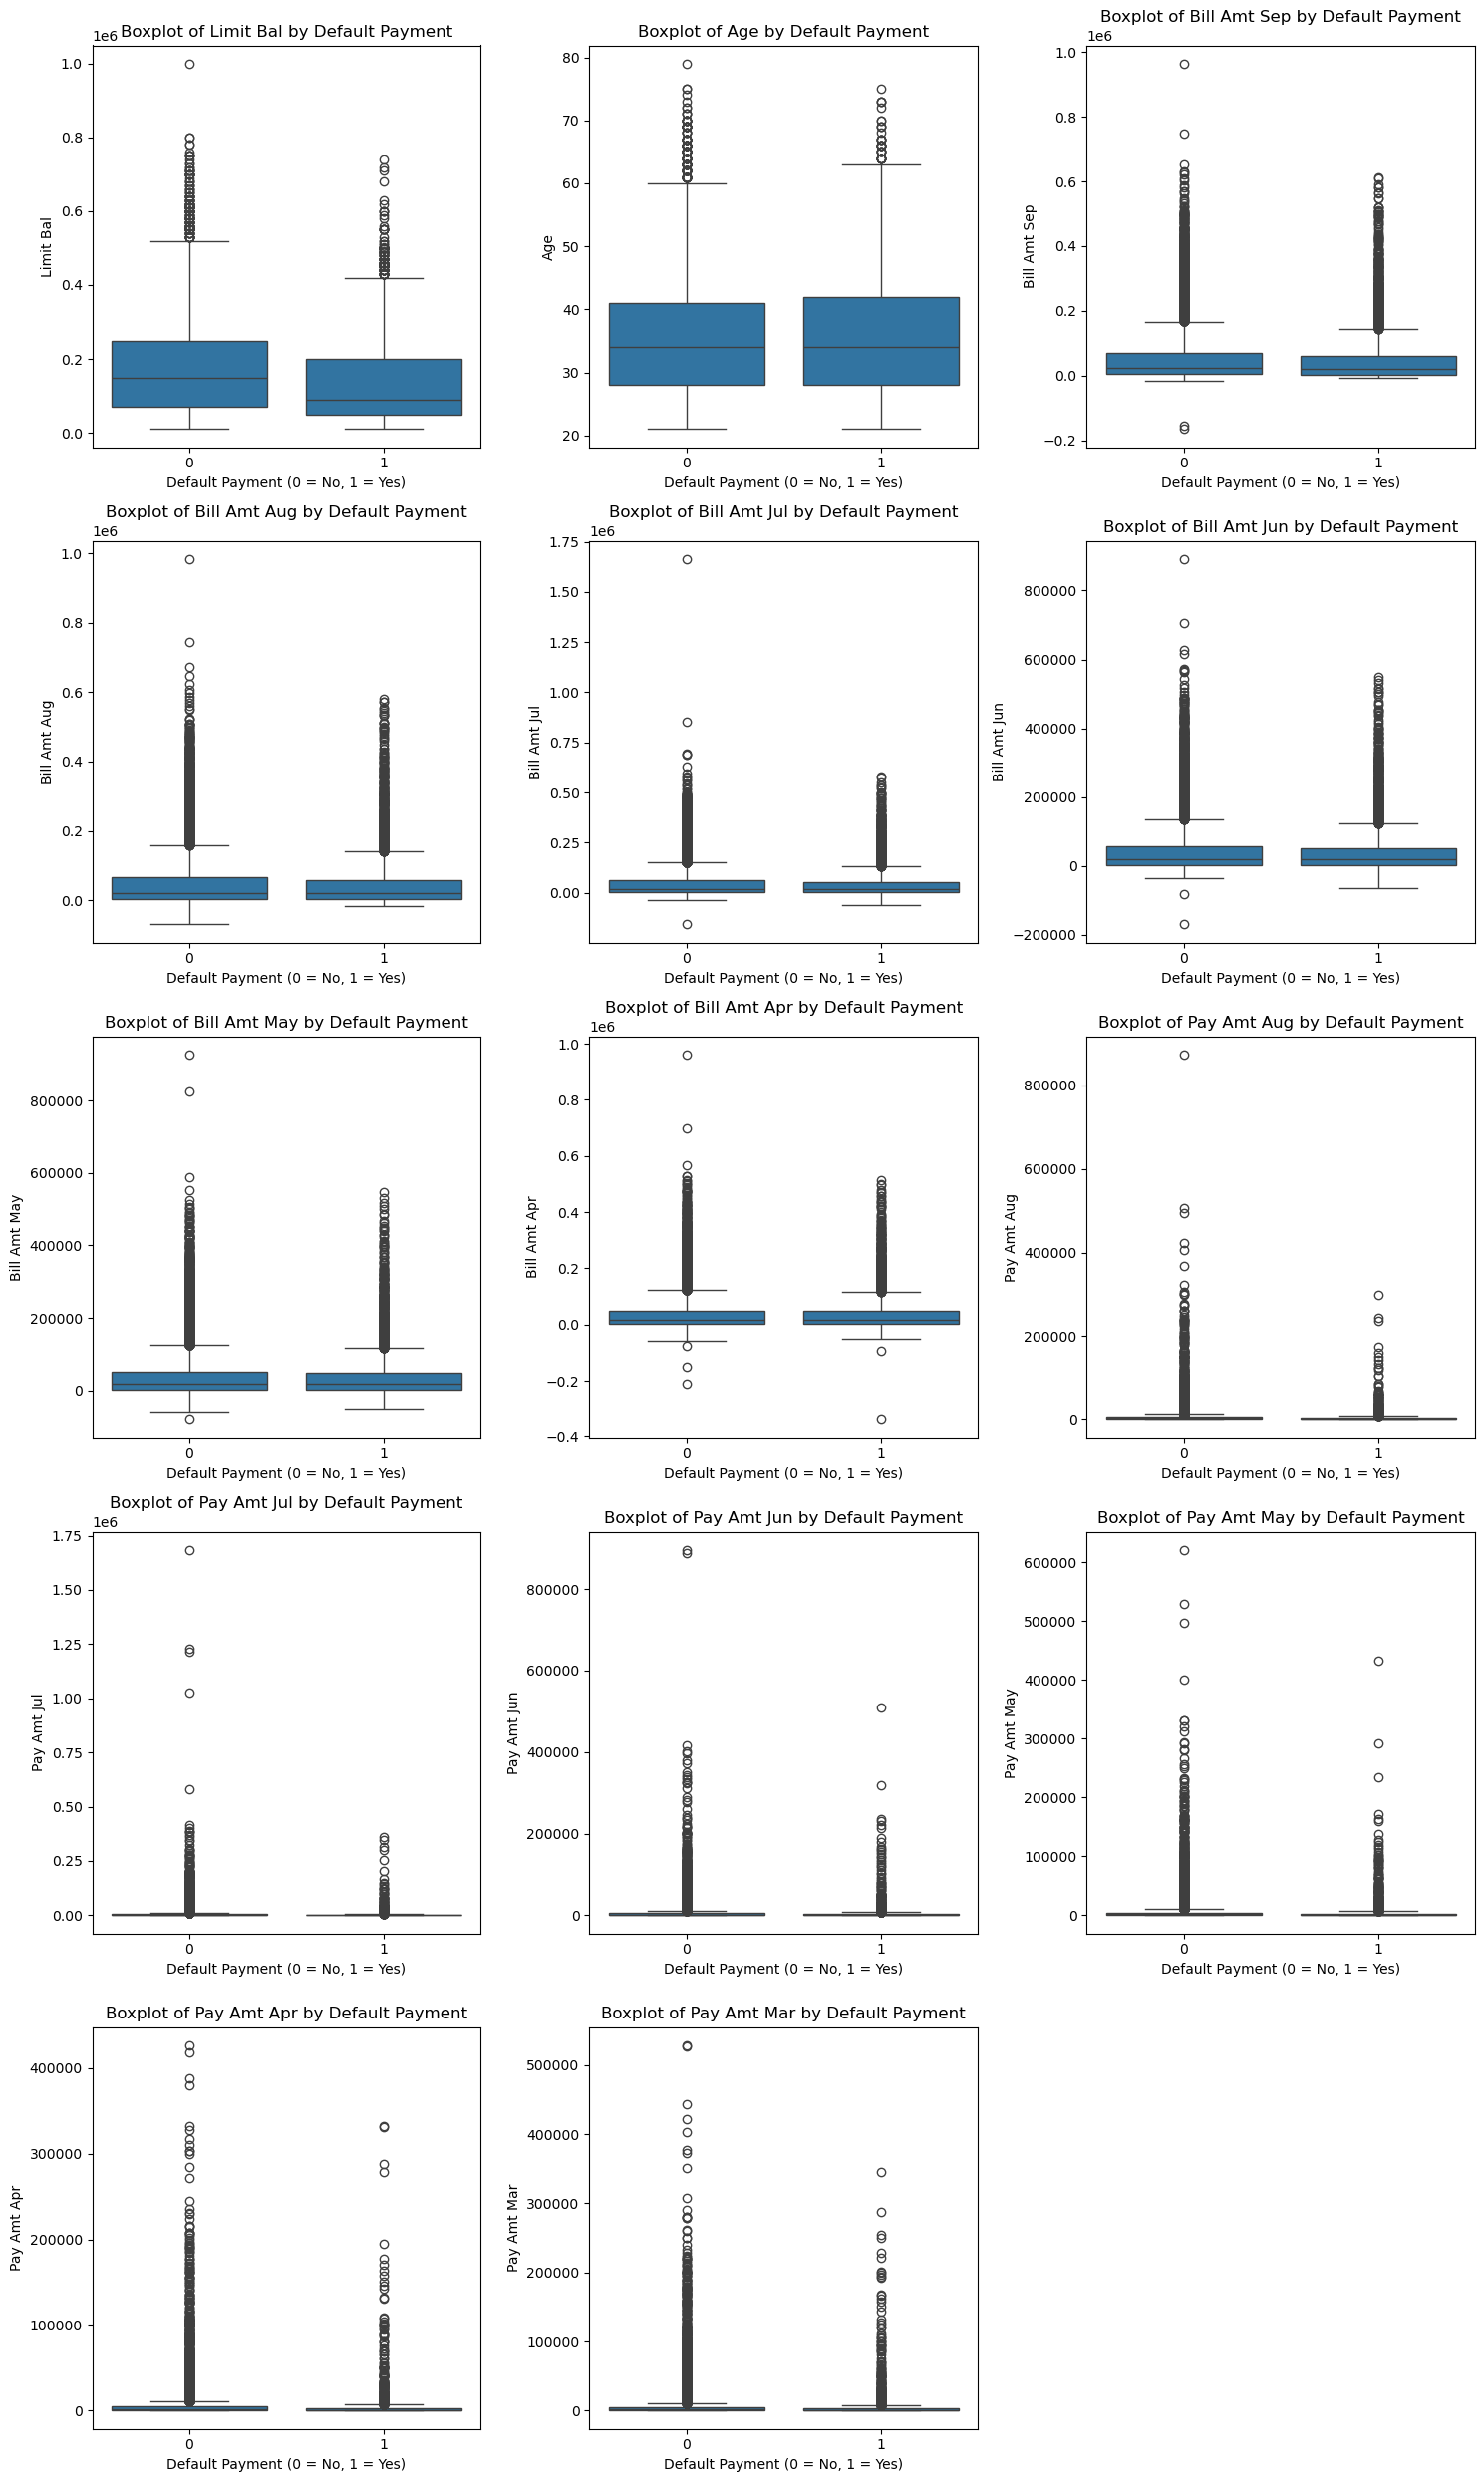

In [40]:
# Define number of rows and columns for subplots
num_vars = len(num_data)
cols = 3  # Number of columns
rows = (num_vars // cols) + (num_vars % cols > 0)  # Calculate rows needed

# Create subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten axes array for easy iteration

# Generate boxplots for each numerical variable grouped by default payment
for i, col in enumerate(num_data):
    sns.boxplot(x=clean_df["default_payment"], y=clean_df[col], ax=axes[i])
    axes[i].set_title(f"Boxplot of {col.replace('_', ' ').title()} by Default Payment")
    axes[i].set_xlabel("Default Payment (0 = No, 1 = Yes)")
    axes[i].set_ylabel(col.replace("_", " ").title())

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


**Comments**

- Bill Amounts (bill_amt_*)
  - Defaulters tend to have higher median bill amounts across all months.
  - There are extreme outliers in both groups, but non-defaulters show more stability in their bill amounts.
- Payment Amounts (pay_amt_*)
  - Defaulters generally pay less than non-defaulters.
  - Some defaulters still make large payments, but their median payments are lower than non-defaulters.
- Credit Limit (limit_bal)
  - Higher credit limits are associated with fewer defaults.
- Age (age)
  - The distribution of age looks similar across default groups.

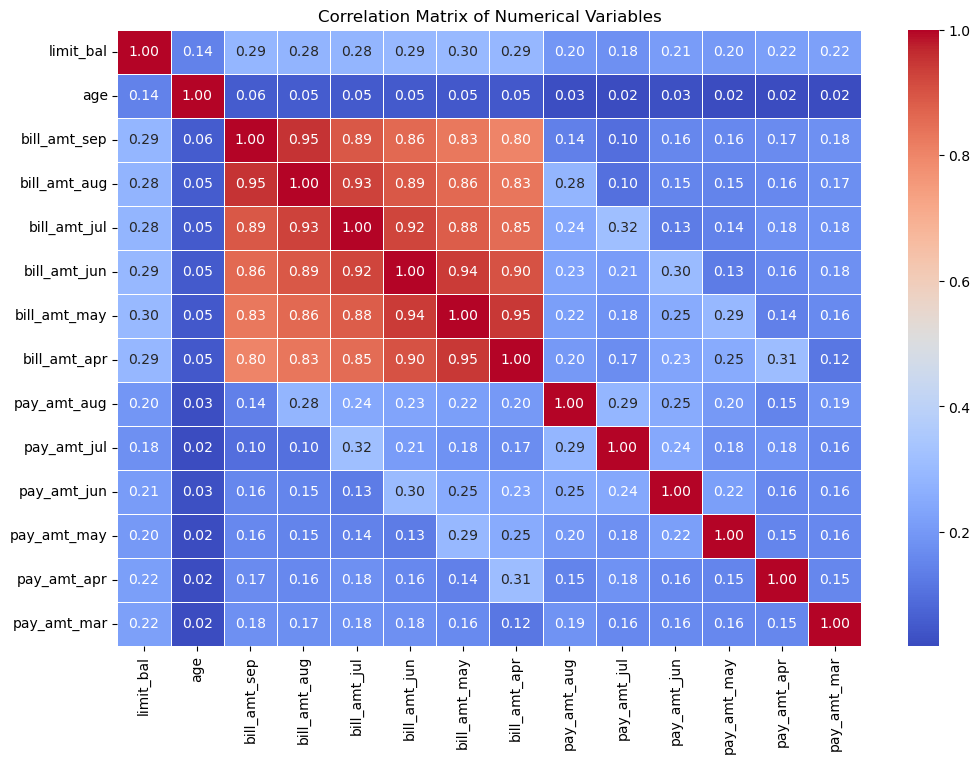

In [42]:
# Compute correlation matrix for numerical variables
corr_matrix = clean_df[num_data].corr()

# Plot heatmap of correlations
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Variables")
plt.show()


**Comments**
1. **Strong Positive Correlations Among Bill Amounts**  
   - Bill amounts for different months are highly correlated (~0.8–0.95).  
   - This suggests that customers who have high balances in one month tend to carry high balances in subsequent months (consistent spending or rolling debt).

2. **Strong Positive Correlations Among Payment Amounts**  
   - Payment amounts across months are also strongly correlated (~0.6–0.9).  
   - This implies that customers who make high payments one month tend to continue making high payments.

3. **Moderate Correlation Between Credit Limit  and Bill Amounts**  
   - Customers with higher credit limits tend to have higher bill amounts (~0.3–0.5 correlation).  
   - This makes sense, as higher credit limits allow for higher spending.

4. **Weak or No Correlation Between Credit Limit and Payments**  
   - Credit limit has little to no correlation with payment amounts (~0.1–0.2).  
   - This suggests that having a higher credit limit does not necessarily mean a person pays more.

5. **Weak to Moderate Negative Correlations Between Payments  and Bill Amounts**  
   - Customers who carry high balances tend to make lower payments relative to their bill amounts (~-0.2 to -0.3).
   - This could indicate that people with high debt struggle to make large payments.

# Modeling

- Task: Classification
- Algorithms
    - Logistic Regression
    - Random forest
    - XGBoost
- Evaluation
  - Classification report
    - Precision
    - Recall
    - F1-Score
    - Accuracy
  - Confusion matrix
  - K-fold cross validation

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
from sklearn import metrics

from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from collections import Counter

# #set random seed to produce reproducible results
# from numpy.random import seed
# seed(1)

## Encoding categorical variable

In [48]:
# One-hot encode 'sex', 'education', 'marriage' (nominal)
df_encoded = pd.get_dummies(clean_df, columns=['sex', 'education', 'marriage'], drop_first=True)

# Convert boolean columns to integer (0 and 1)
df_encoded = df_encoded.astype(int)

In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   limit_bal         30000 non-null  int32
 1   age               30000 non-null  int32
 2   repay_status_sep  30000 non-null  int32
 3   repay_status_aug  30000 non-null  int32
 4   repay_status_jul  30000 non-null  int32
 5   repay_status_jun  30000 non-null  int32
 6   repay_status_may  30000 non-null  int32
 7   repay_status_apr  30000 non-null  int32
 8   bill_amt_sep      30000 non-null  int32
 9   bill_amt_aug      30000 non-null  int32
 10  bill_amt_jul      30000 non-null  int32
 11  bill_amt_jun      30000 non-null  int32
 12  bill_amt_may      30000 non-null  int32
 13  bill_amt_apr      30000 non-null  int32
 14  pay_amt_aug       30000 non-null  int32
 15  pay_amt_jul       30000 non-null  int32
 16  pay_amt_jun       30000 non-null  int32
 17  pay_amt_may       30000 non-nul

In [50]:
df_encoded.head()

,limit_bal,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_amt_sep,bill_amt_aug,...,pay_amt_apr,pay_amt_mar,default_payment,sex_2,education_2,education_3,education_4,education_5,marriage_2,marriage_3
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,1,0,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,...,0,2000,1,1,1,0,0,0,1,0
2,90000,34,0,0,0,0,0,0,29239,14027,...,1000,5000,0,1,1,0,0,0,1,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,1069,1000,0,1,1,0,0,0,0,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,689,679,0,0,1,0,0,0,0,0


## Standardize features

In [52]:
# Initialize the scaler
scaler = StandardScaler()

# Apply standardization (fit on training, transform on both train & test)
# df_encoded[num_data] = scaler.fit_transform(df_encoded[num_data])
df_encoded[['limit_bal', 'age']] = scaler.fit_transform(df_encoded[['limit_bal', 'age']])


# Confirm changes
df_encoded.head()

,limit_bal,age,repay_status_sep,repay_status_aug,repay_status_jul,repay_status_jun,repay_status_may,repay_status_apr,bill_amt_sep,bill_amt_aug,...,pay_amt_apr,pay_amt_mar,default_payment,sex_2,education_2,education_3,education_4,education_5,marriage_2,marriage_3
0,-1.136720,-1.246020,2,2,-1,-1,-2,-2,3913,3102,...,0,0,1,1,1,0,0,0,0,0
1,-0.365981,-1.029047,-1,2,0,0,0,2,2682,1725,...,0,2000,1,1,1,0,0,0,1,0
2,-0.597202,-0.161156,0,0,0,0,0,0,29239,14027,...,1000,5000,0,1,1,0,0,0,1,0
3,-0.905498,0.164303,0,0,0,0,0,0,46990,48233,...,1069,1000,0,1,1,0,0,0,0,0
4,-0.905498,2.334029,-1,0,-1,0,0,0,8617,5670,...,689,679,0,0,1,0,0,0,0,0


## Train-test split data

#### Original data

In [55]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['default_payment'])
y = df_encoded[target]

# Split into training (80%) and testing (20%) sets, stratifying by the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [56]:
# Confirm split shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 27), (6000, 27), (24000,), (6000,))

### 1. Logistic regression

In [58]:
# Initialize Logistic Regression model
lr = LogisticRegression(random_state=42)

In [59]:
# Train the model
lr.fit(X_train, y_train)

C:\Users\Inno Mvula\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [60]:
# Make predictions
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

In [61]:
# Evaluate performance
lr_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

In [62]:
# Display results
lr_metrics

{'Accuracy': 0.7846666666666666,
 'Precision': 0.6158940397350994,
 'Recall': 0.07008289374529013,
 'F1 Score': 0.12584573748308525,
 'AUC-ROC': 0.6704566033835124}

In [63]:
# Get feature importance (coefficients)
feature_importance = pd.DataFrame({
    "feature": X_train.columns,
    "importance": np.abs(lr.coef_[0])  # Use absolute values for easier interpretation
})
# Sort by importance
feature_importance = feature_importance.sort_values(by="importance", ascending=False)

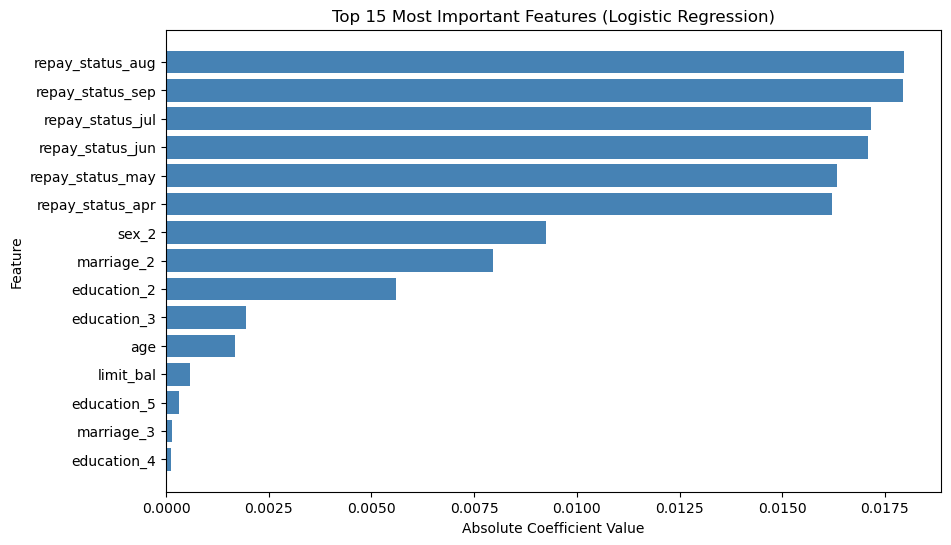

In [64]:
# Plot top 15 features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance["feature"][:15], feature_importance["importance"][:15], color='steelblue')
plt.gca().invert_yaxis()  # Highest values at the top
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.title("Top 15 Most Important Features (Logistic Regression)")
plt.show()

In [65]:
# Display top features
feature_importance.head(5)

,feature,importance
3,repay_status_aug,0.017967
2,repay_status_sep,0.017938
4,repay_status_jul,0.017164
5,repay_status_jun,0.017090
6,repay_status_may,0.016342


In [66]:
# Compute VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_train.columns
vif_data["vif"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

In [67]:
# Sort by VIF score
vif_data = vif_data.sort_values(by="vif", ascending=False)

In [68]:
print(vif_data.head(10))

             feature        vif
9       bill_amt_aug  40.341948
10      bill_amt_jul  36.353573
12      bill_amt_may  34.815593
11      bill_amt_jun  30.147116
13      bill_amt_apr  21.189840
8       bill_amt_sep  20.379838
6   repay_status_may   4.931660
5   repay_status_jun   4.381396
4   repay_status_jul   3.698149
7   repay_status_apr   3.405138


#### 1.1 Logistic Regression with SMOTE

In [70]:
# summarize class distribution
print("Before oversampling: ",Counter(y_train))

Before oversampling:  Counter({0: 18691, 1: 5309})


In [71]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [72]:
# summarize class distribution
print("After oversampling: ",Counter(y_train_smote))

After oversampling:  Counter({0: 18691, 1: 18691})


In [73]:
# Train Logistic Regression on SMOTE data
lr_smote = LogisticRegression(random_state=42)
lr_smote.fit(X_train_smote, y_train_smote)

C:\Users\Inno Mvula\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [74]:
# Make predictions
y_pred_smote = lr_smote.predict(X_test)
y_prob_smote = lr_smote.predict_proba(X_test)[:, 1]  # Probability scores for AUC-ROC

In [75]:
# Evaluate performance
lr_metrics_smote = {
    "Accuracy": accuracy_score(y_test, y_pred_smote),
    "Precision": precision_score(y_test, y_pred_smote),
    "Recall": recall_score(y_test, y_pred_smote),
    "F1 Score": f1_score(y_test, y_pred_smote),
    "AUC-ROC": roc_auc_score(y_test, y_prob_smote)
}

In [76]:
# Display results
lr_metrics_smote

{'Accuracy': 0.738,
 'Precision': 0.42721330956625075,
 'Recall': 0.5418236623963828,
 'F1 Score': 0.4777408637873754,
 'AUC-ROC': 0.6887765032846744}

### 2. Random Forest 

In [78]:
# Define features (X) and target variable (y)
X = clean_df.drop(columns=['default_payment'])
y = clean_df[target]

# Split into training (80%) and testing (20%) sets, stratifying by the target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm split shapes
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((24000, 23), (6000, 23), (24000,), (6000,))

In [79]:
# Initialize model
rf = RandomForestClassifier(random_state=42)

In [80]:
# Fit model
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [81]:
# Make predictions
y_pred = rf.predict(X_test)
y_prob = rf.predict_proba(X_test)[:, 1] 

In [82]:
# Evaluate performance
rf_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

In [83]:
# Display result
rf_metrics

{'Accuracy': 0.8136666666666666,
 'Precision': 0.6398929049531459,
 'Recall': 0.3602110022607385,
 'F1 Score': 0.4609450337512054,
 'AUC-ROC': 0.758218781884613}

### 3. XGBoost

In [85]:
# Initialize model
xgb = XGBClassifier(random_state=42)

In [86]:
# Fit model
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
# Make predictions
y_pred = xgb.predict(X_test)
y_prob = xgb.predict_proba(X_test)[:, 1] 

In [88]:
# Evaluate performance
xgb_metrics = {
    "Accuracy": accuracy_score(y_test, y_pred),
    "Precision": precision_score(y_test, y_pred),
    "Recall": recall_score(y_test, y_pred),
    "F1 Score": f1_score(y_test, y_pred),
    "AUC-ROC": roc_auc_score(y_test, y_prob)
}

In [89]:
# Display result
xgb_metrics

{'Accuracy': 0.8091666666666667,
 'Precision': 0.6184895833333334,
 'Recall': 0.3579502637528259,
 'F1 Score': 0.45346062052505964,
 'AUC-ROC': 0.7576521862110593}

## Plot Results

In [91]:
# Merge into a single dictionary
model_metrics = {'Logistic Regression': lr_metrics,
                 'Logistic Regression SMOTE': lr_metrics_smote,
                 'Random Forest': rf_metrics,
                 'XGBoost': xgb_metrics}

In [92]:
# Extract data for plotting
metrics = list(lr_metrics.keys())
models = list(model_metrics.keys())
values = np.array([[model_metrics[model][metric] for metric in metrics] for model in models])

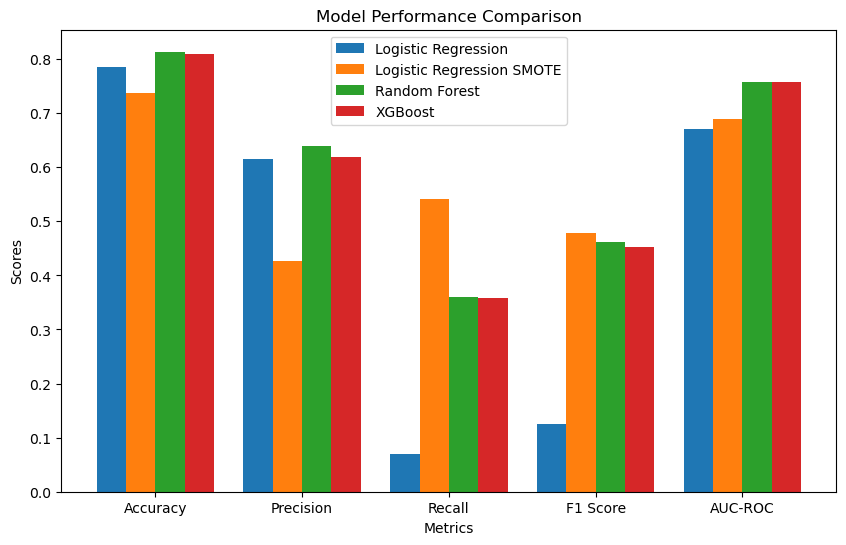

In [93]:
# Plot bar chart
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))
for i, model in enumerate(models):
    ax.bar(x + i * width, values[i], width, label=model)

ax.set_xlabel('Metrics')
ax.set_ylabel('Scores')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width * (len(models) / 2 - 0.5))
ax.set_xticklabels(metrics)
ax.legend()

plt.show()

In [94]:
model_metrics

{'Logistic Regression': {'Accuracy': 0.7846666666666666,
  'Precision': 0.6158940397350994,
  'Recall': 0.07008289374529013,
  'F1 Score': 0.12584573748308525,
  'AUC-ROC': 0.6704566033835124},
 'Logistic Regression SMOTE': {'Accuracy': 0.738,
  'Precision': 0.42721330956625075,
  'Recall': 0.5418236623963828,
  'F1 Score': 0.4777408637873754,
  'AUC-ROC': 0.6887765032846744},
 'Random Forest': {'Accuracy': 0.8136666666666666,
  'Precision': 0.6398929049531459,
  'Recall': 0.3602110022607385,
  'F1 Score': 0.4609450337512054,
  'AUC-ROC': 0.758218781884613},
 'XGBoost': {'Accuracy': 0.8091666666666667,
  'Precision': 0.6184895833333334,
  'Recall': 0.3579502637528259,
  'F1 Score': 0.45346062052505964,
  'AUC-ROC': 0.7576521862110593}}

## Hyperparameter tuning

In [96]:
### Step 5: Hyperparameter Tuning with RandomizedSearchCV
# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "max_features": ["sqrt", "log2", None],
    # "class_weight": [None, "balanced", {0: 1, 1: 2}, {0: 1, 1: 3}, {0: 1, 1: 5}]
}

In [97]:
# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

In [98]:
# Randomized search with cross-validation
rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=param_grid,
    n_iter=20,  # Number of different parameter combinations to try
    cv=3,  # 5-fold cross-validation
    verbose=1,
    n_jobs=-1,
    scoring="recall"  # Optimizing for best recall
)

In [99]:
# Fit the model
rf_search.fit(X_train, y_train)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200, 300]},
                   scoring='recall', verbose=1)

In [100]:
# Get best parameters and best model
best_params = rf_search.best_params_
best_rf_model = rf_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': None}


In [101]:

### Step 6: Evaluate the Tuned Model
y_pred_best = best_rf_model.predict(X_test)
y_prob_best = best_rf_model.predict_proba(X_test)[:, 1]

In [102]:

# Store best model performance
best_rf_results = {
    "Model": "Random Forest (Tuned)",
    "Best Params": best_params,
    "Accuracy": accuracy_score(y_test, y_pred_best),
    "Precision": precision_score(y_test, y_pred_best),
    "Recall": recall_score(y_test, y_pred_best),
    "F1 Score": f1_score(y_test, y_pred_best),
    "AUC-ROC": roc_auc_score(y_test, y_prob_best)
}


In [103]:
print("Tuned Model Performance:")
print(pd.DataFrame([best_rf_results]))

Tuned Model Performance:
                   Model                                        Best Params  \
0  Random Forest (Tuned)  {'n_estimators': 300, 'min_samples_split': 2, ...   

   Accuracy  Precision    Recall  F1 Score   AUC-ROC  
0  0.813167   0.634115  0.366993  0.464916  0.759801  


In [104]:
### Step 6: Cross-Validation
cv_scores = cross_val_score(best_rf_model, X, y, cv=5)
print(f"\n\nCross-Validation Scores : {cv_scores}")
print(f"Mean of the scores: {cv_scores.mean()}")



Cross-Validation Scores : [0.80483333 0.80783333 0.81983333 0.82566667 0.82133333]
Mean of the scores: 0.8159000000000001


#### feature importance

In [106]:
# Extract feature importance
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": best_rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

In [107]:
feature_importance.sort_values('Importance', ascending = False)

,Feature,Importance
5,repay_status_sep,0.097909
4,age,0.066934
0,limit_bal,0.060416
11,bill_amt_sep,0.059795
12,bill_amt_aug,0.054440
13,bill_amt_jul,0.051622
17,pay_amt_aug,0.051326
14,bill_amt_jun,0.050299
16,bill_amt_apr,0.050170
15,bill_amt_may,0.050115


In [108]:
# Identify low-importance features (threshold can be adjusted)
low_importance_features = feature_importance[feature_importance["Importance"] < 0.01]["Feature"].tolist()

In [109]:
print("Low-importance features to consider removing:", low_importance_features)

Low-importance features to consider removing: []


In [110]:
# Drop low-importance features and retrain
X_reduced = X.drop(columns=low_importance_features)
rf_reduced = RandomForestClassifier(n_estimators=200, min_samples_split=10, random_state=42)
rf_reduced.fit(X_reduced, y)

RandomForestClassifier(min_samples_split=10, n_estimators=200, random_state=42)

In [111]:
# Cross-validation with reduced feature set
cv_scores_reduced = cross_val_score(rf_reduced, X_reduced, y, cv=5)
print(f"\n\nCross-Validation Scores (Reduced Features): {cv_scores_reduced}")
print(f"Mean of the scores (Reduced Features): {cv_scores_reduced.mean()}")



Cross-Validation Scores (Reduced Features): [0.80766667 0.80716667 0.82166667 0.83133333 0.82333333]
Mean of the scores (Reduced Features): 0.8182333333333334
